# Preparing to clean the data

In [1]:
# --- Data manipulation ---
import numpy as np
import pandas as pd
from scipy.stats.mstats import winsorize

import warnings
warnings.filterwarnings('ignore')

# --- Data Visualisation ---
import matplotlib.pyplot as plt
import seaborn as sns

# --- Data Processing ---
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer, make_column_transformer, make_column_selector
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer, StandardScaler
from sklearn.impute import SimpleImputer

from sklearn import set_config

# --- SMOTE ---
from imblearn.over_sampling import SMOTE

In [2]:
df = pd.read_csv('../raw_data/Washington_State_HDMA-2016.csv')


In [3]:
df.head()

,tract_to_msamd_income,rate_spread,population,minority_population,number_of_owner_occupied_units,number_of_1_to_4_family_units,loan_amount_000s,hud_median_family_income,applicant_income_000s,state_name,...,applicant_sex_name,applicant_race_name_5,applicant_race_name_4,applicant_race_name_3,applicant_race_name_2,applicant_race_name_1,applicant_ethnicity_name,agency_name,agency_abbr,action_taken_name
0,121.690002,NaN,8381.0,23.790001,2175.0,2660.0,227,73300.0,116.0,Washington,...,Female,NaN,NaN,NaN,NaN,"Information not provided by applicant in mail,...",Not Hispanic or Latino,Consumer Financial Protection Bureau,CFPB,Loan originated
1,83.370003,NaN,4915.0,23.990000,1268.0,1777.0,240,57900.0,42.0,Washington,...,Male,NaN,NaN,NaN,NaN,White,Hispanic or Latino,Department of Housing and Urban Development,HUD,Loan originated
2,91.129997,NaN,5075.0,11.820000,1136.0,1838.0,241,73300.0,117.0,Washington,...,Male,NaN,NaN,NaN,NaN,White,Not Hispanic or Latino,Department of Housing and Urban Development,HUD,Loan originated
3,146.169998,NaN,5032.0,8.590000,1525.0,1820.0,351,73300.0,315.0,Washington,...,Male,NaN,NaN,NaN,NaN,"Information not provided by applicant in mail,...","Information not provided by applicant in mail,...",National Credit Union Administration,NCUA,Loan originated
4,162.470001,NaN,5183.0,10.500000,1705.0,2104.0,417,78100.0,114.0,Washington,...,Female,NaN,NaN,NaN,NaN,White,Not Hispanic or Latino,Federal Deposit Insurance Corporation,FDIC,Loan originated


In [4]:
data = df.copy()

In [5]:
data.head()

,tract_to_msamd_income,rate_spread,population,minority_population,number_of_owner_occupied_units,number_of_1_to_4_family_units,loan_amount_000s,hud_median_family_income,applicant_income_000s,state_name,...,applicant_sex_name,applicant_race_name_5,applicant_race_name_4,applicant_race_name_3,applicant_race_name_2,applicant_race_name_1,applicant_ethnicity_name,agency_name,agency_abbr,action_taken_name
0,121.690002,NaN,8381.0,23.790001,2175.0,2660.0,227,73300.0,116.0,Washington,...,Female,NaN,NaN,NaN,NaN,"Information not provided by applicant in mail,...",Not Hispanic or Latino,Consumer Financial Protection Bureau,CFPB,Loan originated
1,83.370003,NaN,4915.0,23.990000,1268.0,1777.0,240,57900.0,42.0,Washington,...,Male,NaN,NaN,NaN,NaN,White,Hispanic or Latino,Department of Housing and Urban Development,HUD,Loan originated
2,91.129997,NaN,5075.0,11.820000,1136.0,1838.0,241,73300.0,117.0,Washington,...,Male,NaN,NaN,NaN,NaN,White,Not Hispanic or Latino,Department of Housing and Urban Development,HUD,Loan originated
3,146.169998,NaN,5032.0,8.590000,1525.0,1820.0,351,73300.0,315.0,Washington,...,Male,NaN,NaN,NaN,NaN,"Information not provided by applicant in mail,...","Information not provided by applicant in mail,...",National Credit Union Administration,NCUA,Loan originated
4,162.470001,NaN,5183.0,10.500000,1705.0,2104.0,417,78100.0,114.0,Washington,...,Female,NaN,NaN,NaN,NaN,White,Not Hispanic or Latino,Federal Deposit Insurance Corporation,FDIC,Loan originated


In [6]:
data.columns

Index(['tract_to_msamd_income', 'rate_spread', 'population',
       'minority_population', 'number_of_owner_occupied_units',
       'number_of_1_to_4_family_units', 'loan_amount_000s',
       'hud_median_family_income', 'applicant_income_000s', 'state_name',
       'state_abbr', 'sequence_number', 'respondent_id', 'purchaser_type_name',
       'property_type_name', 'preapproval_name', 'owner_occupancy_name',
       'msamd_name', 'loan_type_name', 'loan_purpose_name', 'lien_status_name',
       'hoepa_status_name', 'edit_status_name', 'denial_reason_name_3',
       'denial_reason_name_2', 'denial_reason_name_1', 'county_name',
       'co_applicant_sex_name', 'co_applicant_race_name_5',
       'co_applicant_race_name_4', 'co_applicant_race_name_3',
       'co_applicant_race_name_2', 'co_applicant_race_name_1',
       'co_applicant_ethnicity_name', 'census_tract_number', 'as_of_year',
       'application_date_indicator', 'applicant_sex_name',
       'applicant_race_name_5', 'applicant_rac

In [7]:
data['action_taken_name'].value_counts()

Loan originated                                        263712
Application denied by financial institution             64177
Application withdrawn by applicant                      60358
Loan purchased by the institution                       48356
File closed for incompleteness                          18176
Application approved but not accepted                   11735
Preapproval request denied by financial institution        35
Preapproval request approved but not accepted              17
Name: action_taken_name, dtype: int64

- Loan originated (widely used term in finance. It means the loan has been approved)
- We are only concerned with analysing the primary market for our project, therefore we must remove all rows associated with the action loan purchased by the instituiton.
- We also need to remove all rows associated with the action 'Application withdrawn by client'
- A First Lien Home Equity Loan (First Lien) is a mortgage product, meaning it's a loan secured with real estate as collateral. However, First Liens are generally taken out when you've already purchased a home with a traditional mortgage i.e (second mortgage)

In [8]:
data = data[~data['action_taken_name'].isin(['Application withdrawn by applicant', 'Loan purchased by the institution', 'File closed for incompleteness'])]
data = data[~data['applicant_ethnicity_name'].isin(['Information not provided by applicant in mail, Internet, or telephone application'])]
data = data[~data['applicant_race_name_1'].isin(['Information not provided by applicant in mail, Internet, or telephone application'])]
data = data[~data['applicant_sex_name'].isin(['Information not provided by applicant in mail, Internet, or telephone application'])]
data = data[~data['co_applicant_ethnicity_name'].isin(['Information not provided by applicant in mail, Internet, or telephone application'])]
data = data[~data['co_applicant_race_name_1'].isin(['Information not provided by applicant in mail, Internet, or telephone application'])]
data = data[~data['co_applicant_sex_name'].isin(['Information not provided by applicant in mail, Internet, or telephone application'])]

In [9]:
data.shape

(283359, 47)

In [10]:
data['action_taken_name'].value_counts()


Loan originated                                        222025
Application denied by financial institution             51662
Application approved but not accepted                    9629
Preapproval request denied by financial institution        30
Preapproval request approved but not accepted              13
Name: action_taken_name, dtype: int64

new feature highlighting loan approved for 'loan originated' and not approved for everything else

In [11]:
data['loan_status']=["approved" if x=="Loan originated" else "not approved" for x in data['action_taken_name']]

In [12]:
data.head()

,tract_to_msamd_income,rate_spread,population,minority_population,number_of_owner_occupied_units,number_of_1_to_4_family_units,loan_amount_000s,hud_median_family_income,applicant_income_000s,state_name,...,applicant_race_name_5,applicant_race_name_4,applicant_race_name_3,applicant_race_name_2,applicant_race_name_1,applicant_ethnicity_name,agency_name,agency_abbr,action_taken_name,loan_status
1,83.370003,NaN,4915.0,23.990000,1268.0,1777.0,240,57900.0,42.0,Washington,...,NaN,NaN,NaN,NaN,White,Hispanic or Latino,Department of Housing and Urban Development,HUD,Loan originated,approved
2,91.129997,NaN,5075.0,11.820000,1136.0,1838.0,241,73300.0,117.0,Washington,...,NaN,NaN,NaN,NaN,White,Not Hispanic or Latino,Department of Housing and Urban Development,HUD,Loan originated,approved
4,162.470001,NaN,5183.0,10.500000,1705.0,2104.0,417,78100.0,114.0,Washington,...,NaN,NaN,NaN,NaN,White,Not Hispanic or Latino,Federal Deposit Insurance Corporation,FDIC,Loan originated,approved
5,119.629997,NaN,4775.0,18.889999,954.0,1332.0,206,72300.0,NaN,Washington,...,NaN,NaN,NaN,NaN,White,Not Hispanic or Latino,Office of the Comptroller of the Currency,OCC,Loan originated,approved
6,103.209999,NaN,4745.0,33.070000,1337.0,1442.0,356,90300.0,NaN,Washington,...,NaN,NaN,NaN,NaN,White,Not Hispanic or Latino,Department of Housing and Urban Development,HUD,Loan originated,approved


In [13]:
data.isnull().sum()

tract_to_msamd_income                207
rate_spread                       275917
population                           204
minority_population                  204
number_of_owner_occupied_units       209
number_of_1_to_4_family_units        205
loan_amount_000s                       0
hud_median_family_income             202
applicant_income_000s              23062
state_name                             0
state_abbr                             0
sequence_number                        0
respondent_id                          0
purchaser_type_name                    0
property_type_name                     0
preapproval_name                       0
owner_occupancy_name                   0
msamd_name                         23473
loan_type_name                         0
loan_purpose_name                      0
lien_status_name                       0
hoepa_status_name                      0
edit_status_name                  234345
denial_reason_name_3              282302
denial_reason_na

In [14]:
data.isnull().sum()

tract_to_msamd_income                207
rate_spread                       275917
population                           204
minority_population                  204
number_of_owner_occupied_units       209
number_of_1_to_4_family_units        205
loan_amount_000s                       0
hud_median_family_income             202
applicant_income_000s              23062
state_name                             0
state_abbr                             0
sequence_number                        0
respondent_id                          0
purchaser_type_name                    0
property_type_name                     0
preapproval_name                       0
owner_occupancy_name                   0
msamd_name                         23473
loan_type_name                         0
loan_purpose_name                      0
lien_status_name                       0
hoepa_status_name                      0
edit_status_name                  234345
denial_reason_name_3              282302
denial_reason_na

In [15]:
# data = data.drop(columns=['applicant_race_name_5', 
#                           'applicant_race_name_4',
#                           'applicant_race_name_3','applicant_race_name_2',
#                           'co_applicant_race_name_5',
#                           'co_applicant_race_name_4','co_applicant_race_name_3',
#                           'co_applicant_race_name_2',
#                           'denial_reason_name_3','denial_reason_name_2',
#                           'denial_reason_name_1','rate_spread','edit_status_name',
#                          'state_abbr','respondent_id','agency_abbr','as_of_year',
#                             'application_date_indicator','state_name','sequence_number',
#                          'census_tract_number'])

In [16]:
data = data.drop(columns=['applicant_race_name_5', 'applicant_race_name_4', 'applicant_race_name_3',
                 'applicant_race_name_2', 'co_applicant_race_name_5', 'co_applicant_race_name_4',
                 'co_applicant_race_name_3', 'co_applicant_race_name_2', 'denial_reason_name_3',
                 'denial_reason_name_2', 'denial_reason_name_1', 'rate_spread', 'edit_status_name',
                 'state_abbr', 'respondent_id', 'agency_abbr', 'as_of_year', 'application_date_indicator',
                 'state_name', 'sequence_number', 'census_tract_number', 'action_taken_name'])

In [17]:
data.isnull().sum()

tract_to_msamd_income               207
population                          204
minority_population                 204
number_of_owner_occupied_units      209
number_of_1_to_4_family_units       205
loan_amount_000s                      0
hud_median_family_income            202
applicant_income_000s             23062
purchaser_type_name                   0
property_type_name                    0
preapproval_name                      0
owner_occupancy_name                  0
msamd_name                        23473
loan_type_name                        0
loan_purpose_name                     0
lien_status_name                      0
hoepa_status_name                     0
county_name                         134
co_applicant_sex_name                 0
co_applicant_race_name_1              0
co_applicant_ethnicity_name           0
applicant_sex_name                    0
applicant_race_name_1                 0
applicant_ethnicity_name              0
agency_name                           0


In [18]:
data.shape

(283359, 26)

In [19]:
data.dtypes

tract_to_msamd_income             float64
population                        float64
minority_population               float64
number_of_owner_occupied_units    float64
number_of_1_to_4_family_units     float64
loan_amount_000s                    int64
hud_median_family_income          float64
applicant_income_000s             float64
purchaser_type_name                object
property_type_name                 object
preapproval_name                   object
owner_occupancy_name               object
msamd_name                         object
loan_type_name                     object
loan_purpose_name                  object
lien_status_name                   object
hoepa_status_name                  object
county_name                        object
co_applicant_sex_name              object
co_applicant_race_name_1           object
co_applicant_ethnicity_name        object
applicant_sex_name                 object
applicant_race_name_1              object
applicant_ethnicity_name          

In [20]:
duplicates = data[data.duplicated()]

In [21]:
duplicates

,tract_to_msamd_income,population,minority_population,number_of_owner_occupied_units,number_of_1_to_4_family_units,loan_amount_000s,hud_median_family_income,applicant_income_000s,purchaser_type_name,property_type_name,...,hoepa_status_name,county_name,co_applicant_sex_name,co_applicant_race_name_1,co_applicant_ethnicity_name,applicant_sex_name,applicant_race_name_1,applicant_ethnicity_name,agency_name,loan_status
57,112.559998,4333.0,16.570000,1207.0,1506.0,289,73300.0,NaN,Loan was not originated or was not sold in cal...,One-to-four family dwelling (other than manufa...,...,Not a HOEPA loan,Clark County,No co-applicant,No co-applicant,No co-applicant,Not applicable,Not applicable,Not applicable,Consumer Financial Protection Bureau,approved
147,112.559998,4333.0,16.570000,1207.0,1506.0,289,73300.0,NaN,Loan was not originated or was not sold in cal...,One-to-four family dwelling (other than manufa...,...,Not a HOEPA loan,Clark County,No co-applicant,No co-applicant,No co-applicant,Not applicable,Not applicable,Not applicable,Consumer Financial Protection Bureau,approved
694,171.889999,6690.0,14.740000,2037.0,2137.0,296,65800.0,NaN,Loan was not originated or was not sold in cal...,One-to-four family dwelling (other than manufa...,...,Not a HOEPA loan,Benton County,No co-applicant,No co-applicant,No co-applicant,Not applicable,Not applicable,Not applicable,Consumer Financial Protection Bureau,approved
1762,87.290001,5849.0,20.230000,1428.0,1816.0,184,73300.0,NaN,Loan was not originated or was not sold in cal...,One-to-four family dwelling (other than manufa...,...,Not a HOEPA loan,Clark County,No co-applicant,No co-applicant,No co-applicant,Not applicable,Not applicable,Not applicable,Consumer Financial Protection Bureau,approved
1817,87.290001,5849.0,20.230000,1428.0,1816.0,190,73300.0,NaN,Loan was not originated or was not sold in cal...,One-to-four family dwelling (other than manufa...,...,Not a HOEPA loan,Clark County,No co-applicant,No co-applicant,No co-applicant,Not applicable,Not applicable,Not applicable,Consumer Financial Protection Bureau,approved
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359998,113.930000,3005.0,7.920000,781.0,1182.0,25,61300.0,84.0,Loan was not originated or was not sold in cal...,One-to-four family dwelling (other than manufa...,...,Not a HOEPA loan,Cowlitz County,Male,White,Not Hispanic or Latino,Female,White,Not Hispanic or Latino,National Credit Union Administration,not approved
360043,83.139999,2826.0,16.809999,787.0,1187.0,90,61300.0,NaN,Loan was not originated or was not sold in cal...,One-to-four family dwelling (other than manufa...,...,Not a HOEPA loan,Cowlitz County,No co-applicant,No co-applicant,No co-applicant,Not applicable,Not applicable,Not applicable,Federal Deposit Insurance Corporation,not approved
360638,78.989998,4296.0,18.389999,845.0,1395.0,140,65800.0,42.0,Loan was not originated or was not sold in cal...,One-to-four family dwelling (other than manufa...,...,Not a HOEPA loan,Benton County,Female,White,Not Hispanic or Latino,Male,White,Not Hispanic or Latino,Department of Housing and Urban Development,not approved
363798,70.739998,3361.0,18.510000,964.0,1483.0,210,78100.0,53.0,Loan was not originated or was not sold in cal...,One-to-four family dwelling (other than manufa...,...,Not a HOEPA loan,Kitsap County,Female,White,Not Hispanic or Latino,Male,White,Not Hispanic or Latino,Office of the Comptroller of the Currency,not approved


- No duplicates found 

In [22]:
data

,tract_to_msamd_income,population,minority_population,number_of_owner_occupied_units,number_of_1_to_4_family_units,loan_amount_000s,hud_median_family_income,applicant_income_000s,purchaser_type_name,property_type_name,...,hoepa_status_name,county_name,co_applicant_sex_name,co_applicant_race_name_1,co_applicant_ethnicity_name,applicant_sex_name,applicant_race_name_1,applicant_ethnicity_name,agency_name,loan_status
1,83.370003,4915.0,23.990000,1268.0,1777.0,240,57900.0,42.0,"Life insurance company, credit union, mortgage...",One-to-four family dwelling (other than manufa...,...,Not a HOEPA loan,Walla Walla County,No co-applicant,No co-applicant,No co-applicant,Male,White,Hispanic or Latino,Department of Housing and Urban Development,approved
2,91.129997,5075.0,11.820000,1136.0,1838.0,241,73300.0,117.0,Loan was not originated or was not sold in cal...,One-to-four family dwelling (other than manufa...,...,Not a HOEPA loan,Clark County,Female,White,Not Hispanic or Latino,Male,White,Not Hispanic or Latino,Department of Housing and Urban Development,approved
4,162.470001,5183.0,10.500000,1705.0,2104.0,417,78100.0,114.0,Freddie Mac (FHLMC),One-to-four family dwelling (other than manufa...,...,Not a HOEPA loan,Kitsap County,Male,White,Not Hispanic or Latino,Female,White,Not Hispanic or Latino,Federal Deposit Insurance Corporation,approved
5,119.629997,4775.0,18.889999,954.0,1332.0,206,72300.0,NaN,"Life insurance company, credit union, mortgage...",One-to-four family dwelling (other than manufa...,...,Not a HOEPA loan,Pierce County,No co-applicant,No co-applicant,No co-applicant,Male,White,Not Hispanic or Latino,Office of the Comptroller of the Currency,approved
6,103.209999,4745.0,33.070000,1337.0,1442.0,356,90300.0,NaN,Ginnie Mae (GNMA),One-to-four family dwelling (other than manufa...,...,Not a HOEPA loan,Snohomish County,No co-applicant,No co-applicant,No co-applicant,Male,White,Not Hispanic or Latino,Department of Housing and Urban Development,approved
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466560,NaN,NaN,NaN,NaN,NaN,237,NaN,47.0,Loan was not originated or was not sold in cal...,Manufactured housing,...,Not a HOEPA loan,NaN,Female,Asian,Not Hispanic or Latino,Male,White,Not Hispanic or Latino,Department of Housing and Urban Development,not approved
466561,NaN,NaN,NaN,NaN,NaN,178,NaN,97.0,Loan was not originated or was not sold in cal...,One-to-four family dwelling (other than manufa...,...,Not a HOEPA loan,NaN,Male,White,Not Hispanic or Latino,Female,White,Not Hispanic or Latino,Department of Housing and Urban Development,not approved
466562,NaN,NaN,NaN,NaN,NaN,110,NaN,30.0,Loan was not originated or was not sold in cal...,One-to-four family dwelling (other than manufa...,...,Not a HOEPA loan,NaN,No co-applicant,No co-applicant,No co-applicant,Male,White,Not Hispanic or Latino,Department of Housing and Urban Development,not approved
466564,88.690002,4725.0,45.880001,1188.0,1686.0,255,72300.0,77.0,Loan was not originated or was not sold in cal...,One-to-four family dwelling (other than manufa...,...,Not a HOEPA loan,Pierce County,Female,White,Not Hispanic or Latino,Male,White,Not Hispanic or Latino,Department of Housing and Urban Development,not approved


In [23]:
def clean_data(data: pd.DataFrame):
    # Define list of columns to filter for "Information not provided" values
    filter_cols = ['applicant_ethnicity_name', 'applicant_race_name_1', 'applicant_sex_name',
                   'co_applicant_ethnicity_name', 'co_applicant_race_name_1', 'co_applicant_sex_name']
    
    # Filter for rows where "action_taken_name" is not equal to certain values
    data = data.loc[~data['action_taken_name'].isin(['Application withdrawn by applicant', 'Loan purchased by the institution', 'File closed for incompleteness'])]
    
    # Filter for rows where values in specified columns are not equal to "Information not provided"
    for col in filter_cols:
        data = data.loc[~data[col].isin(['Information not provided by applicant in mail, Internet, or telephone application'])]
        
    # Drop rows with missing values in "county_name" column
    data = data.dropna(subset=['county_name'])
    
    # Create new column "loan_status" based on "action_taken_name"
    data['loan_status'] = np.where(data['action_taken_name'] == 'Loan originated', 'approved', 'not approved')
    
    # Drop irrelevant columns
    drop_cols = ['applicant_race_name_5', 'applicant_race_name_4', 'applicant_race_name_3',
                 'applicant_race_name_2', 'co_applicant_race_name_5', 'co_applicant_race_name_4',
                 'co_applicant_race_name_3', 'co_applicant_race_name_2', 'denial_reason_name_3',
                 'denial_reason_name_2', 'denial_reason_name_1', 'rate_spread', 'edit_status_name',
                 'state_abbr', 'respondent_id', 'agency_abbr', 'as_of_year', 'application_date_indicator',
                 'state_name', 'sequence_number', 'census_tract_number', 'action_taken_name']
    data = data.drop(columns=drop_cols)
    
    # Winsorize numeric columns
    data.select_dtypes(exclude=['object']).apply(lambda x: winsorize(x, limits=[0.05, 0.05]), axis=0, raw=True)
        
    return data

In [24]:
data['applicant_sex_name'].value_counts()

Male              201147
Female             78863
Not applicable      3349
Name: applicant_sex_name, dtype: int64

In [25]:
data['applicant_sex_name'].value_counts()

Male              201147
Female             78863
Not applicable      3349
Name: applicant_sex_name, dtype: int64

In [26]:
data.shape

(283359, 26)

In [27]:
data.dtypes


tract_to_msamd_income             float64
population                        float64
minority_population               float64
number_of_owner_occupied_units    float64
number_of_1_to_4_family_units     float64
loan_amount_000s                    int64
hud_median_family_income          float64
applicant_income_000s             float64
purchaser_type_name                object
property_type_name                 object
preapproval_name                   object
owner_occupancy_name               object
msamd_name                         object
loan_type_name                     object
loan_purpose_name                  object
lien_status_name                   object
hoepa_status_name                  object
county_name                        object
co_applicant_sex_name              object
co_applicant_race_name_1           object
co_applicant_ethnicity_name        object
applicant_sex_name                 object
applicant_race_name_1              object
applicant_ethnicity_name          

In [28]:
# create a list of columns to be converted
cols_to_convert = [
    'tract_to_msamd_income','population','minority_population','number_of_owner_occupied_units',
    'number_of_1_to_4_family_units','loan_amount_000s','hud_median_family_income','applicant_income_000s'
]

# use the astype() method to convert the dtype of columns
data[cols_to_convert] = data[cols_to_convert].astype('float')

In [29]:
data.dtypes

tract_to_msamd_income             float64
population                        float64
minority_population               float64
number_of_owner_occupied_units    float64
number_of_1_to_4_family_units     float64
loan_amount_000s                  float64
hud_median_family_income          float64
applicant_income_000s             float64
purchaser_type_name                object
property_type_name                 object
preapproval_name                   object
owner_occupancy_name               object
msamd_name                         object
loan_type_name                     object
loan_purpose_name                  object
lien_status_name                   object
hoepa_status_name                  object
county_name                        object
co_applicant_sex_name              object
co_applicant_race_name_1           object
co_applicant_ethnicity_name        object
applicant_sex_name                 object
applicant_race_name_1              object
applicant_ethnicity_name          

In [30]:
data.isnull().sum().sort_values(ascending=False)

msamd_name                        23473
applicant_income_000s             23062
number_of_owner_occupied_units      209
tract_to_msamd_income               207
number_of_1_to_4_family_units       205
minority_population                 204
population                          204
hud_median_family_income            202
county_name                         134
agency_name                           0
applicant_ethnicity_name              0
applicant_race_name_1                 0
applicant_sex_name                    0
co_applicant_ethnicity_name           0
co_applicant_race_name_1              0
co_applicant_sex_name                 0
loan_type_name                        0
hoepa_status_name                     0
lien_status_name                      0
loan_purpose_name                     0
owner_occupancy_name                  0
preapproval_name                      0
property_type_name                    0
purchaser_type_name                   0
loan_amount_000s                      0


In [31]:
data['county_name'].value_counts()

King County            82757
Pierce County          36112
Snohomish County       35737
Clark County           23514
Spokane County         17799
Kitsap County          10893
Thurston County        10330
Whatcom County          8112
Benton County           7681
Yakima County           5992
Skagit County           4928
Cowlitz County          4176
Island County           4175
Franklin County         2925
Chelan County           2812
Lewis County            2440
Clallam County          2406
Mason County            2309
Grant County            2254
Grays Harbor County     2014
Kittitas County         1846
Walla Walla County      1801
Douglas County          1399
Stevens County          1270
Jefferson County        1169
Whitman County           935
Okanogan County          863
Asotin County            700
Pacific County           673
San Juan County          573
Klickitat County         559
Pend Oreille County      475
Skamania County          426
Adams County             392
Lincoln County

In [32]:
data.shape


(283359, 26)

In [33]:
data['county_name'].isnull().sum()

134

In [34]:
data = data.dropna(subset=['county_name'])

In [35]:
data.shape

(283225, 26)

In [36]:
data.shape

(283225, 26)

In [37]:
data

,tract_to_msamd_income,population,minority_population,number_of_owner_occupied_units,number_of_1_to_4_family_units,loan_amount_000s,hud_median_family_income,applicant_income_000s,purchaser_type_name,property_type_name,...,hoepa_status_name,county_name,co_applicant_sex_name,co_applicant_race_name_1,co_applicant_ethnicity_name,applicant_sex_name,applicant_race_name_1,applicant_ethnicity_name,agency_name,loan_status
1,83.370003,4915.0,23.990000,1268.0,1777.0,240.0,57900.0,42.0,"Life insurance company, credit union, mortgage...",One-to-four family dwelling (other than manufa...,...,Not a HOEPA loan,Walla Walla County,No co-applicant,No co-applicant,No co-applicant,Male,White,Hispanic or Latino,Department of Housing and Urban Development,approved
2,91.129997,5075.0,11.820000,1136.0,1838.0,241.0,73300.0,117.0,Loan was not originated or was not sold in cal...,One-to-four family dwelling (other than manufa...,...,Not a HOEPA loan,Clark County,Female,White,Not Hispanic or Latino,Male,White,Not Hispanic or Latino,Department of Housing and Urban Development,approved
4,162.470001,5183.0,10.500000,1705.0,2104.0,417.0,78100.0,114.0,Freddie Mac (FHLMC),One-to-four family dwelling (other than manufa...,...,Not a HOEPA loan,Kitsap County,Male,White,Not Hispanic or Latino,Female,White,Not Hispanic or Latino,Federal Deposit Insurance Corporation,approved
5,119.629997,4775.0,18.889999,954.0,1332.0,206.0,72300.0,NaN,"Life insurance company, credit union, mortgage...",One-to-four family dwelling (other than manufa...,...,Not a HOEPA loan,Pierce County,No co-applicant,No co-applicant,No co-applicant,Male,White,Not Hispanic or Latino,Office of the Comptroller of the Currency,approved
6,103.209999,4745.0,33.070000,1337.0,1442.0,356.0,90300.0,NaN,Ginnie Mae (GNMA),One-to-four family dwelling (other than manufa...,...,Not a HOEPA loan,Snohomish County,No co-applicant,No co-applicant,No co-applicant,Male,White,Not Hispanic or Latino,Department of Housing and Urban Development,approved
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
452825,109.730003,5035.0,18.830000,1249.0,1567.0,280.0,73300.0,115.0,Loan was not originated or was not sold in cal...,One-to-four family dwelling (other than manufa...,...,Not a HOEPA loan,Clark County,Female,White,Not Hispanic or Latino,Male,White,Not Hispanic or Latino,Consumer Financial Protection Bureau,not approved
452834,59.049999,3608.0,17.959999,579.0,1150.0,300.0,72300.0,85.0,Loan was not originated or was not sold in cal...,One-to-four family dwelling (other than manufa...,...,Not a HOEPA loan,Pierce County,No co-applicant,No co-applicant,No co-applicant,Male,White,Not Hispanic or Latino,Department of Housing and Urban Development,not approved
464253,101.290001,8722.0,39.070000,2012.0,2432.0,319.0,61400.0,74.0,Loan was not originated or was not sold in cal...,One-to-four family dwelling (other than manufa...,...,Not a HOEPA loan,Skagit County,Female,White,Not Hispanic or Latino,Male,White,Not Hispanic or Latino,Department of Housing and Urban Development,not approved
466564,88.690002,4725.0,45.880001,1188.0,1686.0,255.0,72300.0,77.0,Loan was not originated or was not sold in cal...,One-to-four family dwelling (other than manufa...,...,Not a HOEPA loan,Pierce County,Female,White,Not Hispanic or Latino,Male,White,Not Hispanic or Latino,Department of Housing and Urban Development,not approved


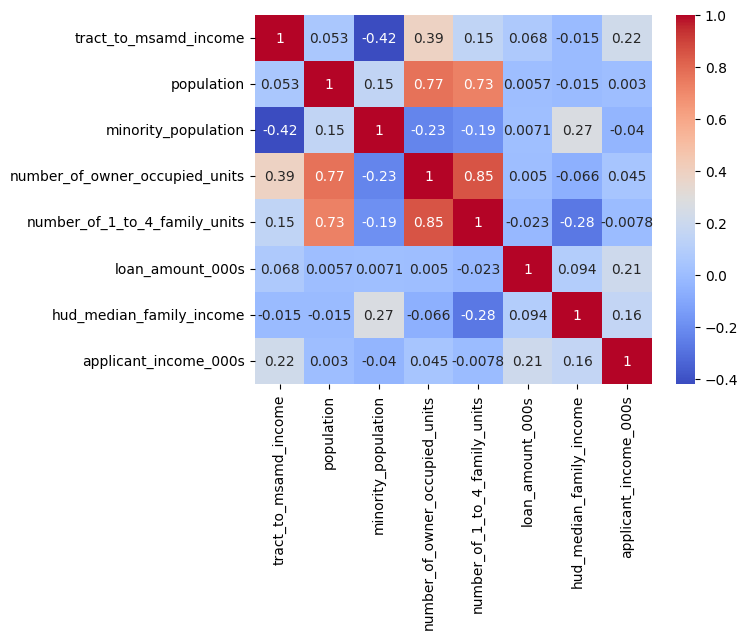

In [38]:
# compute correlation matrix
corr_matrix = data.corr()

# plot heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# show plot
plt.show()


In [39]:
data.isnull().sum()/len(data) * 100

tract_to_msamd_income             0.025775
population                        0.024715
minority_population               0.024715
number_of_owner_occupied_units    0.026481
number_of_1_to_4_family_units     0.025068
loan_amount_000s                  0.000000
hud_median_family_income          0.024009
applicant_income_000s             8.132757
purchaser_type_name               0.000000
property_type_name                0.000000
preapproval_name                  0.000000
owner_occupancy_name              0.000000
msamd_name                        8.240445
loan_type_name                    0.000000
loan_purpose_name                 0.000000
lien_status_name                  0.000000
hoepa_status_name                 0.000000
county_name                       0.000000
co_applicant_sex_name             0.000000
co_applicant_race_name_1          0.000000
co_applicant_ethnicity_name       0.000000
applicant_sex_name                0.000000
applicant_race_name_1             0.000000
applicant_e

In [40]:
data['msamd_name'].value_counts()

Seattle, Bellevue, Everett - WA            118482
Tacoma, Lakewood - WA                       36109
Portland, Vancouver, Hillsboro - OR, WA     23935
Spokane, Spokane Valley - WA                19539
Bremerton, Silverdale - WA                  10892
Kennewick, Richland - WA                    10603
Olympia, Tumwater - WA                      10329
Bellingham - WA                              8106
Yakima - WA                                  5990
Mount Vernon, Anacortes - WA                 4920
Wenatchee - WA                               4211
Longview - WA                                4176
Walla Walla - WA                             1894
Lewiston - ID, WA                             700
Name: msamd_name, dtype: int64

In [41]:
data['county_name'].value_counts()

King County            82757
Pierce County          36112
Snohomish County       35737
Clark County           23514
Spokane County         17799
Kitsap County          10893
Thurston County        10330
Whatcom County          8112
Benton County           7681
Yakima County           5992
Skagit County           4928
Cowlitz County          4176
Island County           4175
Franklin County         2925
Chelan County           2812
Lewis County            2440
Clallam County          2406
Mason County            2309
Grant County            2254
Grays Harbor County     2014
Kittitas County         1846
Walla Walla County      1801
Douglas County          1399
Stevens County          1270
Jefferson County        1169
Whitman County           935
Okanogan County          863
Asotin County            700
Pacific County           673
San Juan County          573
Klickitat County         559
Pend Oreille County      475
Skamania County          426
Adams County             392
Lincoln County

# Visualisation 

Which county has the highest number of loan applications?

In [42]:
loan_counts = data.groupby(['county_name', 'loan_status']).size().unstack()

In [43]:
data['loan_status'].value_counts().sum()

283225

In [44]:
county_totals = loan_counts['approved'].sum()

In [45]:
max_county = loan_counts['approved'].idxmax()

In [46]:
max_county

'King County'

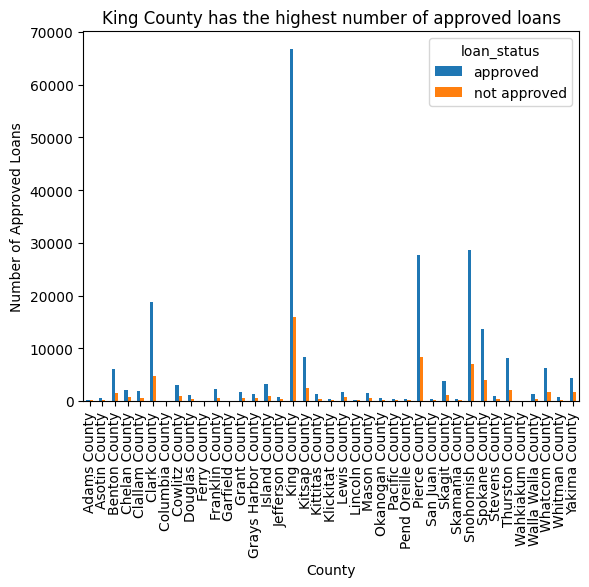

In [47]:
# create a bar chart showing the number of approved loans for each county
loan_counts.plot(kind='bar')

# add labels and title to the chart
plt.xlabel('County')
plt.ylabel('Number of Approved Loans')
plt.title(f'{max_county} has the highest number of approved loans')

# display the chart
plt.show()

In [48]:
county_totals = loan_counts['approved'].sum()/data['loan_status'].value_counts().sum() * 100

In [49]:
county_totals

78.38043957983935

Does your purpose for loan application play a pivotal part?

In [50]:
data['loan_purpose_name']

1            Home purchase
2              Refinancing
4         Home improvement
5              Refinancing
6              Refinancing
                ...       
452825       Home purchase
452834       Home purchase
464253       Home purchase
466564       Home purchase
466565       Home purchase
Name: loan_purpose_name, Length: 283225, dtype: object

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

# create a crosstab of loan purpose and loan approval status
ct = pd.crosstab(data['loan_purpose_name'], data['loan_status'])

In [52]:
ct

loan_status,approved,not approved
loan_purpose_name,,
Home improvement,12021,4806
Home purchase,104806,14966
Refinancing,105166,41460


In [53]:
# calculate the percentage of approved loans for each loan purpose
ct['approved_percent'] = ct['approved'] / (ct['approved'] + ct['not approved']) * 100

In [54]:
ct

loan_status,approved,not approved,approved_percent
loan_purpose_name,,,
Home improvement,12021,4806,71.438759
Home purchase,104806,14966,87.504592
Refinancing,105166,41460,71.723978


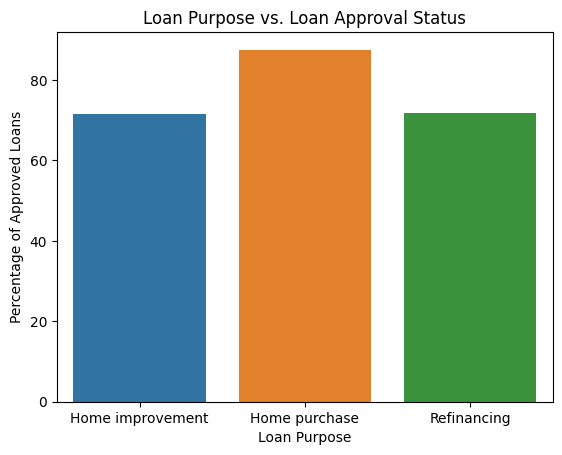

In [55]:
# create a bar chart showing the percentage of approved loans for each loan purpose
sns.barplot(x=ct.index, y='approved_percent', data=ct)
# add labels and title to the chart
plt.xlabel('Loan Purpose')
plt.ylabel('Percentage of Approved Loans')
plt.title('Loan Purpose vs. Loan Approval Status')

# display the chart
plt.show()

In [56]:
data.shape

(283225, 26)

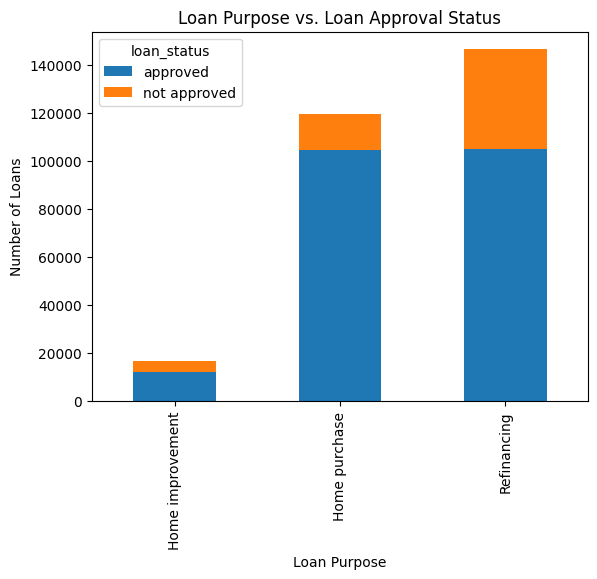

In [57]:
# create a crosstab of loan purpose and loan approval status
ct_lp = pd.crosstab(data['loan_purpose_name'], data['loan_status'])

# create a stacked bar chart showing the relationship between loan purpose and loan approval status
ct_lp.plot(kind='bar', stacked=True)

# add labels and title to the chart
plt.xlabel('Loan Purpose')
plt.ylabel('Number of Loans')
plt.title('Loan Purpose vs. Loan Approval Status')

# display the chart
plt.show()

Which types of loans have a better chance of being approved?

In [58]:
data['loan_type_name'].value_counts()

Conventional          208789
FHA-insured            36780
VA-guaranteed          35335
FSA/RHS-guaranteed      2321
Name: loan_type_name, dtype: int64

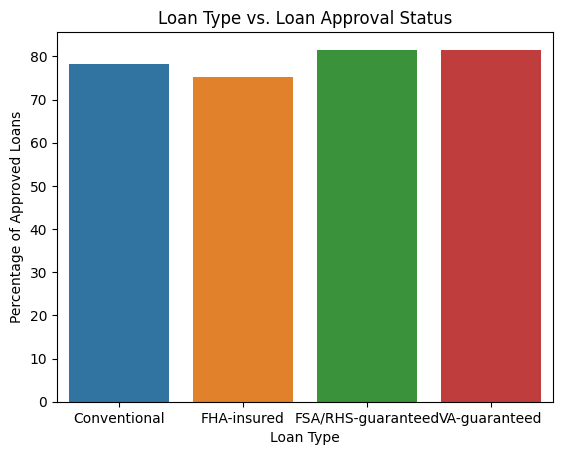

In [59]:
# create a crosstab of loan type and loan approval status
ct_lt = pd.crosstab(data['loan_type_name'],data['loan_status'])

# calculate the percentage of approved loans for each loan type
ct_lt['approved_percent'] = ct_lt['approved'] / (ct_lt['approved'] + ct_lt['not approved']) * 100

# create a bar chart showing the percentage of approved loans for each loan type
sns.barplot(x=ct_lt.index, y='approved_percent', data=ct_lt)

# add labels and title to the chart
plt.xlabel('Loan Type')
plt.ylabel('Percentage of Approved Loans')
plt.title('Loan Type vs. Loan Approval Status')

# display the chart
plt.show()

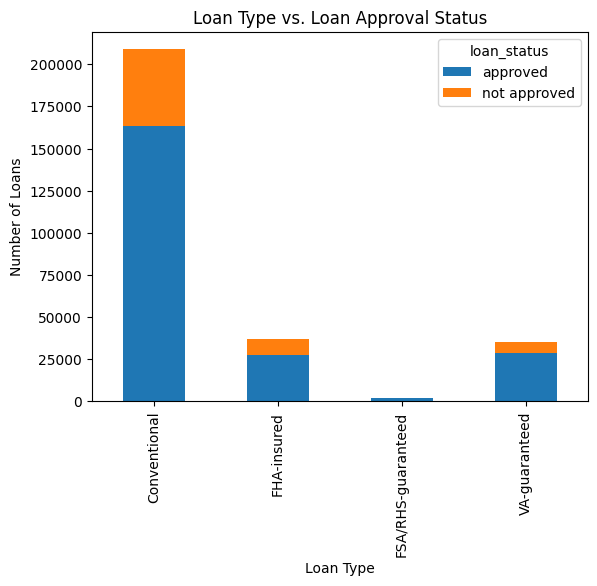

In [60]:
# create a crosstab of loan type and loan approval status
ct_ltp = pd.crosstab(data['loan_type_name'], data['loan_status'])

# create a stacked bar chart showing the relationship between loan type and loan approval status
ct_ltp.plot(kind='bar', stacked=True)

# add labels and title to the chart
plt.xlabel('Loan Type')
plt.ylabel('Number of Loans')
plt.title('Loan Type vs. Loan Approval Status')

# display the chart
plt.show()

Applicant Income and Loan Amount

In [61]:
data.dtypes

tract_to_msamd_income             float64
population                        float64
minority_population               float64
number_of_owner_occupied_units    float64
number_of_1_to_4_family_units     float64
loan_amount_000s                  float64
hud_median_family_income          float64
applicant_income_000s             float64
purchaser_type_name                object
property_type_name                 object
preapproval_name                   object
owner_occupancy_name               object
msamd_name                         object
loan_type_name                     object
loan_purpose_name                  object
lien_status_name                   object
hoepa_status_name                  object
county_name                        object
co_applicant_sex_name              object
co_applicant_race_name_1           object
co_applicant_ethnicity_name        object
applicant_sex_name                 object
applicant_race_name_1              object
applicant_ethnicity_name          

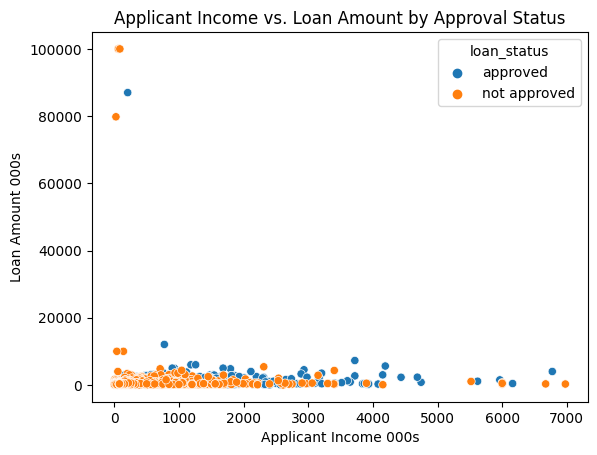

In [62]:
# create a scatter plot of applicant income vs. loan amount, color-coded by approval status
sns.scatterplot(x='applicant_income_000s', y='loan_amount_000s', hue='loan_status', data=data)

# add labels and title to the chart
plt.xlabel('Applicant Income 000s')
plt.ylabel('Loan Amount 000s')
plt.title('Applicant Income vs. Loan Amount by Approval Status')

# display the chart
plt.show()


In [63]:
data['owner_occupancy_name'].value_counts()

Owner-occupied as a principal dwelling        257042
Not owner-occupied as a principal dwelling     24817
Not applicable                                  1366
Name: owner_occupancy_name, dtype: int64

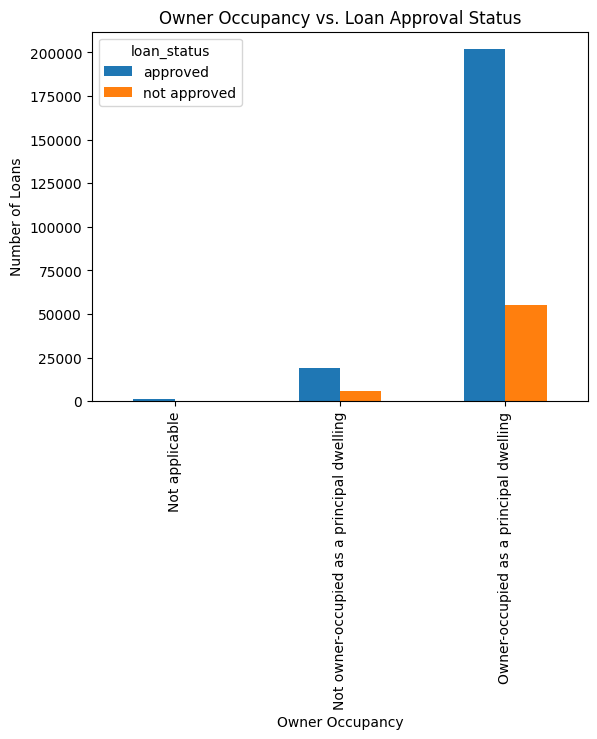

In [64]:
# create a crosstab of owner occupancy and loan approval status
cto = pd.crosstab(data['owner_occupancy_name'], data['loan_status'])

# create a bar chart showing the relationship between owner occupancy and loan approval status
cto.plot(kind='bar', stacked=False)

# add labels and title to the chart
plt.xlabel('Owner Occupancy')
plt.ylabel('Number of Loans')
plt.title('Owner Occupancy vs. Loan Approval Status')

# display the chart
plt.show()

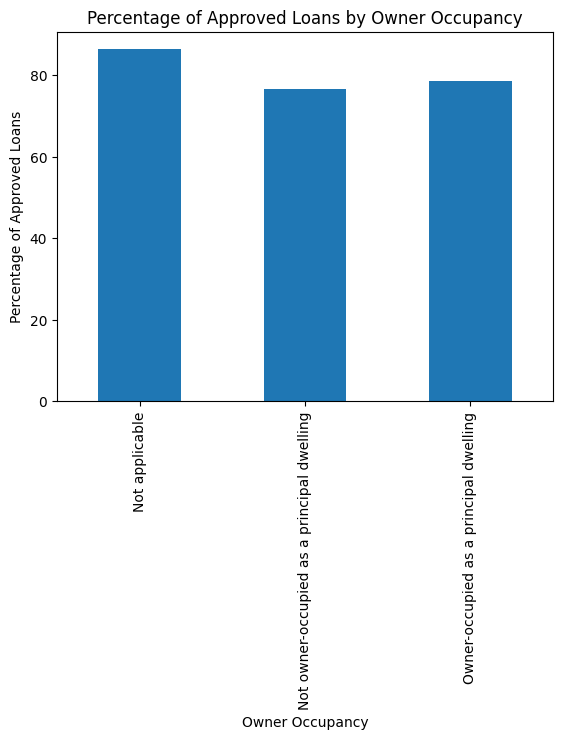

In [65]:
# create a crosstab of owner occupancy and loan approval status
ctoo = pd.crosstab(data['owner_occupancy_name'], data['loan_status'])

# calculate the percentage of approved loans for each owner occupancy category
ctoo['approval_pct'] = ctoo['approved'] / (ctoo['approved'] + ctoo['not approved']) * 100

# create a bar chart showing the percentage of approved loans for each owner occupancy category
ctoo['approval_pct'].plot(kind='bar',stacked = True)

# add labels and title to the chart
plt.xlabel('Owner Occupancy')
plt.ylabel('Percentage of Approved Loans')
plt.title('Percentage of Approved Loans by Owner Occupancy')

# display the chart
plt.show()

In [66]:
data.shape


(283225, 26)

# Make the pipeline. Label encode categorical variables 

In [67]:
data.dtypes

tract_to_msamd_income             float64
population                        float64
minority_population               float64
number_of_owner_occupied_units    float64
number_of_1_to_4_family_units     float64
loan_amount_000s                  float64
hud_median_family_income          float64
applicant_income_000s             float64
purchaser_type_name                object
property_type_name                 object
preapproval_name                   object
owner_occupancy_name               object
msamd_name                         object
loan_type_name                     object
loan_purpose_name                  object
lien_status_name                   object
hoepa_status_name                  object
county_name                        object
co_applicant_sex_name              object
co_applicant_race_name_1           object
co_applicant_ethnicity_name        object
applicant_sex_name                 object
applicant_race_name_1              object
applicant_ethnicity_name          

In [68]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

In [69]:
X = data.drop(columns='loan_status')
y = data['loan_status']

In [70]:
data.dtypes

tract_to_msamd_income             float64
population                        float64
minority_population               float64
number_of_owner_occupied_units    float64
number_of_1_to_4_family_units     float64
loan_amount_000s                  float64
hud_median_family_income          float64
applicant_income_000s             float64
purchaser_type_name                object
property_type_name                 object
preapproval_name                   object
owner_occupancy_name               object
msamd_name                         object
loan_type_name                     object
loan_purpose_name                  object
lien_status_name                   object
hoepa_status_name                  object
county_name                        object
co_applicant_sex_name              object
co_applicant_race_name_1           object
co_applicant_ethnicity_name        object
applicant_sex_name                 object
applicant_race_name_1              object
applicant_ethnicity_name          

In [71]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

num_pipe = make_pipeline(SimpleImputer(strategy='median'),StandardScaler())
num_col = make_column_selector(dtype_include=['float64'])

cat_pipe = OneHotEncoder()
cat_col = ['purchaser_type_name','property_type_name','preapproval_name','owner_occupancy_name','msamd_name',
                   'loan_type_name','loan_purpose_name','lien_status_name','hoepa_status_name','county_name',
                   'co_applicant_sex_name','co_applicant_race_name_1','co_applicant_ethnicity_name','applicant_sex_name',
                   'applicant_race_name_1','applicant_ethnicity_name','agency_name']

targ_pipe = OrdinalEncoder(categories=[['not approved', 'approved']])
targ_col = ['loan_status']




preprocessor = make_column_transformer(
    (num_pipe, num_col),
    (cat_pipe, cat_col),
    (targ_pipe, targ_col),
    remainder='passthrough',
    sparse_threshold=0.1
)

preprocessor

ColumnTransformer(remainder='passthrough', sparse_threshold=0.1,
                  transformers=[('pipeline',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x16d92d3c0>),
                                ('onehotencoder', OneHotEncoder(),
                                 ['purchaser_type_name', 'property_type_name',...
                                  'msamd_name', 'loan_type_name',
                                  'loan_purpose_name', 'lien_status_name',
                                  'hoepa_status_name', 'county_name',
                                  'co_applicant_sex_name',
                                  'co_applicant_race_name_1',
                                  'co_applicant_ethnicity_name',
                                  'applicant_sex_name', 'applicant_race_name_1',
                                  'applicant_ethnicity_name', 'agency_name']),
                                ('ordinalencoder',
                                 OrdinalEncoder(categories=[['not approved',
                                                             'approved']]),
                                 ['loan_status'])])

In [72]:
proc_data = pd.DataFrame(preprocessor.fit_transform(data), columns=preprocessor.get_feature_names_out())
proc_data.head()

,pipeline__tract_to_msamd_income,pipeline__population,pipeline__minority_population,pipeline__number_of_owner_occupied_units,pipeline__number_of_1_to_4_family_units,pipeline__loan_amount_000s,pipeline__hud_median_family_income,pipeline__applicant_income_000s,onehotencoder__purchaser_type_name_Affiliate institution,"onehotencoder__purchaser_type_name_Commercial bank, savings bank or savings association",...,onehotencoder__applicant_ethnicity_name_Hispanic or Latino,onehotencoder__applicant_ethnicity_name_Not Hispanic or Latino,onehotencoder__applicant_ethnicity_name_Not applicable,onehotencoder__agency_name_Consumer Financial Protection Bureau,onehotencoder__agency_name_Department of Housing and Urban Development,onehotencoder__agency_name_Federal Deposit Insurance Corporation,onehotencoder__agency_name_Federal Reserve System,onehotencoder__agency_name_National Credit Union Administration,onehotencoder__agency_name_Office of the Comptroller of the Currency,ordinalencoder__loan_status
0,-0.808809,-0.227090,-0.042841,-0.242257,-0.069575,-0.075359,-1.443497,-0.592029,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,-0.543652,-0.131155,-0.849096,-0.502244,0.019678,-0.074134,-0.258590,0.068782,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,1.894020,-0.066399,-0.936546,0.618456,0.408880,0.141471,0.110732,0.042350,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.430187,-0.311033,-0.380713,-0.860710,-0.720684,-0.117011,-0.335532,-0.186731,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
4,-0.130881,-0.329021,0.558704,-0.106355,-0.559735,0.066744,1.049424,-0.186731,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [112]:
proc_data.shape

(283225, 127)

In [118]:
X = proc_data.drop(columns='ordinalencoder__loan_status')
y = proc_data['ordinalencoder__loan_status']

In [119]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.3)

In [120]:
# instantiate the SMOTE function with 'minority' sampling strategy
sm = SMOTE(sampling_strategy='minority')

# apply SMOTE to the data
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

In [121]:
X_train_sm.shape

(310530, 126)

In [122]:
y_train_sm.value_counts()

0.0    155265
1.0    155265
Name: ordinalencoder__loan_status, dtype: int64

# Model Building

In [123]:
X = X_train_sm
y = y_train_sm

In [124]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score

In [125]:
model = LogisticRegression(C=1.0, penalty ='l1',solver='liblinear', max_iter=10000)
model.fit(X, y)

LogisticRegression(max_iter=10000, penalty='l1', solver='liblinear')

In [ ]:
accuracy = model.score(X_test, y_test)
print(f'Test accuracy: {accuracy:.3f}')

In [ ]:
# from sklearn.model_selection import GridSearchCV

# param_grid = {'C': [0.1, 1, 10], 'penalty':['l1'], 'solver': ['lbfgs', 'liblinear']}
# grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5)
# grid_search.fit(X, y)

# print(f'Best parameters: {grid_search.best_params_}')
# print(f'Best cross-validation score: {grid_search.best_score_:.3f}')

In [134]:
train_scores = []
test_scores = []

n_train_samples = int(100 * len(X))
    
# Select a random subset of the training data based on the current n_train_samples
X_subset = X[:n_train_samples]
y_subset = y[:n_train_samples]

# Train the logistic regression model on the subset of training data
model.fit(X_subset, y_subset)

model.predict(X_subset)

array([0., 1., 1., ..., 0., 0., 0.])

In [135]:
train_pred = model.predict(X_subset)

In [136]:
accuracy_score(y_subset, train_pred)

0.9037902940134609

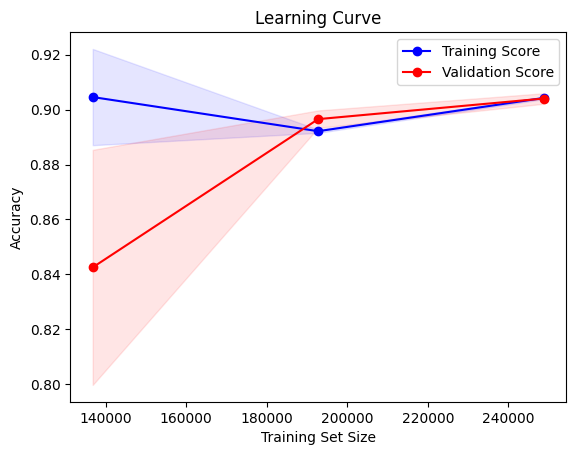

In [91]:
# Import libraries and load data
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import learning_curve, validation_curve
import matplotlib.pyplot as plt


# Plot the learning curve
train_sizes, train_scores, test_scores = learning_curve(lr, X, y, n_jobs=-1)
mean_train_scores = np.mean(train_scores, axis=1)
std_train_scores = np.std(train_scores, axis=1)
mean_test_scores = np.mean(test_scores, axis=1)
std_test_scores = np.std(test_scores, axis=1)

plt.figure()
plt.title('Learning Curve')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.fill_between(train_sizes, mean_train_scores - std_train_scores, mean_train_scores + std_train_scores, alpha=0.1, color='b')
plt.fill_between(train_sizes, mean_test_scores - std_test_scores, mean_test_scores + std_test_scores, alpha=0.1, color='r')
plt.plot(train_sizes, mean_train_scores, 'o-', color='b', label='Training Score')
plt.plot(train_sizes, mean_test_scores, 'o-', color='r', label='Validation Score')
plt.legend(loc='best')

# Plot the validation curve
param_range = [0.01, 0.1, 1, 10]
train_scores, test_scores = validation_curve(lr, X, y, param_name='C', param_range=param_range)


In [92]:
data.head(5)

,tract_to_msamd_income,population,minority_population,number_of_owner_occupied_units,number_of_1_to_4_family_units,loan_amount_000s,hud_median_family_income,applicant_income_000s,purchaser_type_name,property_type_name,...,hoepa_status_name,county_name,co_applicant_sex_name,co_applicant_race_name_1,co_applicant_ethnicity_name,applicant_sex_name,applicant_race_name_1,applicant_ethnicity_name,agency_name,loan_status
1,83.370003,4915.0,23.990000,1268.0,1777.0,240.0,57900.0,42.0,"Life insurance company, credit union, mortgage...",One-to-four family dwelling (other than manufa...,...,Not a HOEPA loan,Walla Walla County,No co-applicant,No co-applicant,No co-applicant,Male,White,Hispanic or Latino,Department of Housing and Urban Development,approved
2,91.129997,5075.0,11.820000,1136.0,1838.0,241.0,73300.0,117.0,Loan was not originated or was not sold in cal...,One-to-four family dwelling (other than manufa...,...,Not a HOEPA loan,Clark County,Female,White,Not Hispanic or Latino,Male,White,Not Hispanic or Latino,Department of Housing and Urban Development,approved
4,162.470001,5183.0,10.500000,1705.0,2104.0,417.0,78100.0,114.0,Freddie Mac (FHLMC),One-to-four family dwelling (other than manufa...,...,Not a HOEPA loan,Kitsap County,Male,White,Not Hispanic or Latino,Female,White,Not Hispanic or Latino,Federal Deposit Insurance Corporation,approved
5,119.629997,4775.0,18.889999,954.0,1332.0,206.0,72300.0,NaN,"Life insurance company, credit union, mortgage...",One-to-four family dwelling (other than manufa...,...,Not a HOEPA loan,Pierce County,No co-applicant,No co-applicant,No co-applicant,Male,White,Not Hispanic or Latino,Office of the Comptroller of the Currency,approved
6,103.209999,4745.0,33.070000,1337.0,1442.0,356.0,90300.0,NaN,Ginnie Mae (GNMA),One-to-four family dwelling (other than manufa...,...,Not a HOEPA loan,Snohomish County,No co-applicant,No co-applicant,No co-applicant,Male,White,Not Hispanic or Latino,Department of Housing and Urban Development,approved


In [102]:
y_test

169425    1.0
236228    0.0
243520    0.0
210544    1.0
188139    1.0
         ... 
24286     1.0
132581    1.0
81399     1.0
101276    1.0
250048    0.0
Name: ordinalencoder__loan_status, Length: 84968, dtype: float64

In [128]:
y_test_filtered = y_test[y_test != 1.0]

In [129]:
X_test[y_test != 1.0]

,pipeline__tract_to_msamd_income,pipeline__population,pipeline__minority_population,pipeline__number_of_owner_occupied_units,pipeline__number_of_1_to_4_family_units,pipeline__loan_amount_000s,pipeline__hud_median_family_income,pipeline__applicant_income_000s,onehotencoder__purchaser_type_name_Affiliate institution,"onehotencoder__purchaser_type_name_Commercial bank, savings bank or savings association",...,onehotencoder__applicant_race_name_1_White,onehotencoder__applicant_ethnicity_name_Hispanic or Latino,onehotencoder__applicant_ethnicity_name_Not Hispanic or Latino,onehotencoder__applicant_ethnicity_name_Not applicable,onehotencoder__agency_name_Consumer Financial Protection Bureau,onehotencoder__agency_name_Department of Housing and Urban Development,onehotencoder__agency_name_Federal Deposit Insurance Corporation,onehotencoder__agency_name_Federal Reserve System,onehotencoder__agency_name_National Credit Union Administration,onehotencoder__agency_name_Office of the Comptroller of the Currency
267541,-0.780790,0.755043,2.446149,0.285595,0.114784,-0.227263,1.049424,-0.451056,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
228531,-0.790016,1.144178,0.298343,0.210750,0.783450,-0.211338,-1.043398,-0.777056,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
261451,-0.399456,0.660907,0.478542,0.805568,3.218156,-0.228488,-1.043398,-0.768246,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
247441,0.225510,0.921730,0.232094,0.807537,1.569169,-0.161112,-1.043398,-0.785867,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
230013,1.687293,-1.680502,-0.677510,-1.362957,-1.534203,-0.032483,-0.835655,-0.186731,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272195,-0.442851,1.278487,-0.188590,0.492402,0.815640,-0.060659,-0.520193,-0.547975,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
258237,-0.623609,-0.267263,-0.107103,-0.135899,-0.191018,0.038568,1.049424,0.007107,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
260934,0.194757,-1.246397,-0.890171,-0.675568,-0.773357,0.090020,0.110732,-0.081002,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
278171,1.245136,-1.255991,-1.155831,-0.724808,-1.065990,-0.339966,-0.258590,-0.477489,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [130]:
y_pred = model.predict(X_test[y_test != 1.0])

In [131]:
accuracy = accuracy_score(y_test_filtered,y_pred)

In [132]:
accuracy

0.9704495614035088